In [218]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE


In [261]:
#fns = ["model_bg.pkl"]
fns = ["model_bg_multi4_all_128.pkl", "avg_bg_m4.pkl"]

KEYS = ['%Iused', '%commit', '%fio', '%fio-10', '%fio-300', '%fio-60', '%fmem', '%fmem-10', '%fmem-300', 
        '%fmem-60', '%fsused', '%gnice', '%guest', '%idle', '%iowait', '%irq', '%memused', '%nice', '%scpu', 
        '%scpu-10', '%scpu-300', '%scpu-60', '%sio', '%sio-10', '%sio-300', '%sio-60', '%smem', '%smem-10', 
        '%smem-300', '%smem-60', '%soft', '%steal', '%sys', '%ufsused', '%usr', '%util', '%vmeff', 'CPU', 
        'INTR', 'Ifree', 'Iused', 'MBfsfree', 'MBfsused', 'aqu-sz', 'areq-sz', 'await', 'bdscd/s', 'blocked', 
        'bread/s', 'bwrtn/s', 'cswch/s', 'dentunusd', 'dkB/s', 'dtps', 'fault/s', 'file-nr', 'inode-nr', 'intr/s', 
        'kbactive', 'kbanonpg', 'kbavail', 'kbbuffers', 'kbcached', 'kbcommit', 'kbdirty', 'kbinact', 'kbkstack', 
        'kbmemfree', 'kbmemused', 'kbpgtbl', 'kbslab', 'kbvmused', 'ldavg-1', 'ldavg-15', 'ldavg-5', 'majflt/s', 
        'pgfree/s', 'pgpgin/s', 'pgpgout/s', 'pgscand/s', 'pgscank/s', 'pgsteal/s', 'plist-sz', 'proc/s', 
        'pswpin/s', 'pswpout/s', 'pty-nr', 'rkB/s', 'rtps', 'runq-sz', 'timestamp', 'tps_x', 'tps_y', 
        'wkB/s', 'wtps']

BGS = {}
BGS["ffmpeg.sh"] = "cpu"
BGS["cpp_bench.sh"] = "cpu"
BGS["hayden.sh"] = "cpu"
BGS["scoutfish.sh"] = "cpu"
BGS["interbench.sh"] = "cpu"
BGS["pbmc.sh"] = "cpu"
BGS["percolation.sh"] = "cpu"
BGS["radix.sh"] = "cpu"
BGS["datasci_bench.sh"] = "cpu"
BGS["learned_sort.sh"] = "cpu"
BGS["lxml.sh"] = "cpu"
BGS["sysbench.sh"] = "cpu"
BGS["ansibench.sh"] = "cpu"
BGS["pybench.sh"] = "cpu"
BGS["sentences.sh"] = "cpu"
BGS["matrix.sh"] = "cpu"

BGS["fio.sh"] = "io"
BGS["iozone.sh"] = "io"
BGS["bonnie.sh"] = "io"
BGS["cgrep.sh"] = "io"
BGS["ripgrep.sh"] = "io"
BGS["newfio.sh"] = "io"

BGS["memtier.sh"] = "redis"
BGS["redis.sh"] = "redis"

BGS["rambench.sh"] = "mem"
BGS["tinymem.sh"] = "mem"


#fn = fns[1]
fn = fns[0]
fn = "./../embeddings/" + fn
print(fn)

#fn = "./../embeddings/all_noimdb3_128_fixed.pkl"
#fn = "./../embeddings/all_noimdbwk_128_fixed.pkl"
#fn = "./../embeddings/all_noimdb_128_fixed.pkl"
#fn = "./../embeddings/all_noimdbwk_128_rep2_fixed.pkl"

./../embeddings/model_bg_multi4_all_128.pkl


In [262]:

avgfn = fns[-1]
with open(fn, "rb") as f:
    avgdata = pickle.load(f)
# TODO: INDEXES:

avgdata[0][1]

array([ 0.0141087 ,  0.15028244,  0.1371645 ,  0.01828408, -0.04136876,
       -0.10090542,  0.02523148,  0.20458007,  0.04434325,  0.11685827,
       -0.18436232, -0.00598814,  0.09464434,  0.01527075, -0.10096309,
        0.01826661,  0.19060652,  0.10368057, -0.23556821,  0.12663546,
        0.02765363, -0.1360722 , -0.177656  , -0.02468738,  0.00684355,
        0.01244656,  0.18449289, -0.0202416 ,  0.0444498 , -0.00735597,
       -0.11675025, -0.14084557,  0.10308166,  0.04994977, -0.13088702,
        0.07966401, -0.103065  ,  0.00759686,  0.15825935, -0.16463014,
        0.06949049,  0.01999069,  0.08882961, -0.2742089 ,  0.02827566,
       -0.04548374,  0.01771625, -0.10507587, -0.00706673,  0.1718956 ,
       -0.01079603, -0.02618143, -0.03603933, -0.00273994, -0.10559043,
        0.03488535, -0.06499825,  0.04373273,  0.09336914,  0.20891482,
        0.02690127,  0.15681061,  0.0430534 ,  0.05754038,  0.07311028,
        0.01117672, -0.00110411,  0.0666403 , -0.05210403, -0.12

In [263]:
avgdata[1][1]

array([ 0.0492586 ,  0.25477958,  0.07563408,  0.0596683 , -0.03655864,
       -0.12432092, -0.01159221,  0.19148722,  0.00892156,  0.13121529,
       -0.14849792, -0.11509983,  0.02066775,  0.03396722, -0.02426324,
        0.02534999,  0.16427922,  0.11072809, -0.21577036,  0.10358598,
        0.08329183, -0.04969144, -0.2091364 , -0.06042239,  0.05689242,
       -0.01609664,  0.15395384,  0.05602776, -0.00459029, -0.03078143,
       -0.1594622 , -0.16925213,  0.15512289,  0.07037697, -0.2102708 ,
        0.06787424, -0.11430237, -0.02344427,  0.18936116, -0.10716826,
        0.05677026,  0.03104353,  0.13368014, -0.27565458,  0.07402141,
        0.01595575, -0.06361716, -0.07163023, -0.0214446 ,  0.15929055,
       -0.0632349 ,  0.12390299, -0.05183251, -0.01979405, -0.08892358,
        0.00837512, -0.03555824,  0.0095512 ,  0.0378312 ,  0.09396191,
       -0.03584263,  0.11492032,  0.06720044,  0.09204672,  0.05628315,
       -0.02047587, -0.06317716, -0.0023415 , -0.02564219, -0.11

In [264]:
def get_bg_type(bgname):
    if bgname in BGS:
        return BGS[bgname]
    elif "-" in bgname:
        bgnames = bgname.split("-")
        bgnames = [get_bg_type(cbg) for cbg in bgnames]
        bgnames.sort()
        return '-'.join(bgnames)
    elif "None" in bgname:
        return "None"
    else:
        print(bgname)
        return "unknown"

In [265]:
with open(fn, "rb") as f:
    data = pickle.load(f)
    
xs = [d[1] for d in data]
xs = np.array(xs)
instances = [d[0]["lt_type"] for d in data]
bgs = [d[0]["bk_kind"] for d in data]
bg_types = [get_bg_type(d[0]["bk_kind"]) for d in data]

In [266]:
print(len(avgdata))
print(len(data))
print(set(bg_types))

16368
16368
{'redis', 'io-redis', 'mem-mem', 'cpu-mem', 'io', 'cpu-io', 'mem', 'None', 'cpu', 'mem-redis', 'cpu-redis', 'io-mem', 'io-io', 'cpu-cpu'}


In [267]:
tsne_em = TSNE(n_components = 2, perplexity = 30.0, early_exaggeration = 12, 
               n_iter = 1000, learning_rate = 368, verbose = 1).fit_transform(xs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16368 samples in 0.001s...
[t-SNE] Computed neighbors for 16368 samples in 0.955s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16368
[t-SNE] Computed conditional probabilities for sample 2000 / 16368
[t-SNE] Computed conditional probabilities for sample 3000 / 16368
[t-SNE] Computed conditional probabilities for sample 4000 / 16368
[t-SNE] Computed conditional probabilities for sample 5000 / 16368
[t-SNE] Computed conditional probabilities for sample 6000 / 16368
[t-SNE] Computed conditional probabilities for sample 7000 / 16368
[t-SNE] Computed conditional probabilities for sample 8000 / 16368
[t-SNE] Computed conditional probabilities for sample 9000 / 16368
[t-SNE] Computed conditional probabilities for sample 10000 / 16368
[t-SNE] Computed conditional probabilities for sample 11000 / 16368
[t-SNE] Computed conditional probabilities for sample 12000 / 16368
[t-SNE] Computed conditional probabilities for sam

In [268]:
AVG_IDX=0
KEY_NAME = KEYS[AVG_IDX]
avg_nums = [avgdata[di][1][AVG_IDX] for di,d in enumerate(data)]

./../embeddings/model_bg_multi4_all_128_%fio.pdf


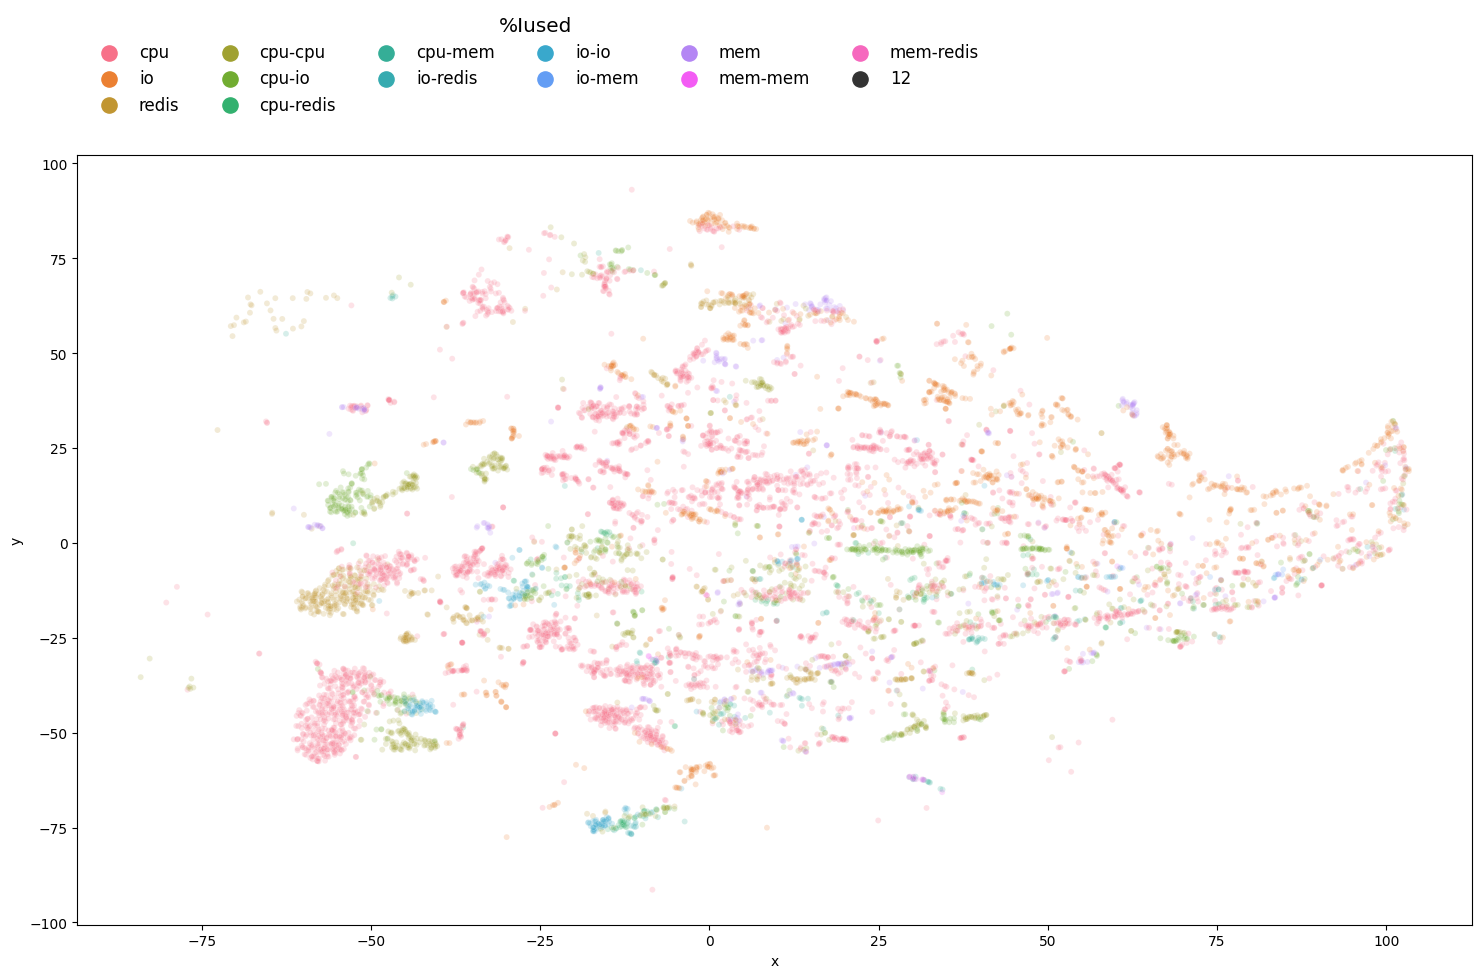

In [269]:
plt.rc('legend',fontsize=12) # using a size in points
#plt.rc('legend',fontsize='medium') # using a named size

df = pd.DataFrame({'x':tsne_em[:,0], 'y': tsne_em[:,1], 'instance': instances,
                   'bg_kind':bgs,
                    'bg_types':bg_types,
                   'avg_nums':avg_nums})
df = df[df["bg_kind"] != "None"]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))

sns.scatterplot(data=df, x="x",y="y", hue="bg_types", ax=ax, alpha=0.2, size=12)
#plt.legend(fontsize="x-large") # using a named size

legend = ax.legend(loc='upper left', bbox_to_anchor=(0.0,1.20), 
                   ncol=6, 
                  frameon=False,
                  )
legend.set_title(KEY_NAME,prop={'size':'x-large'})

for handle in legend.legendHandles:
    handle.set_sizes([120.0])

outname = fn.replace(".pkl", "_%fio.pdf")
print(outname)
plt.savefig(outname, bbox_inches="tight")

./../embeddings/model_bg_multi4_all_128_%fio.pdf


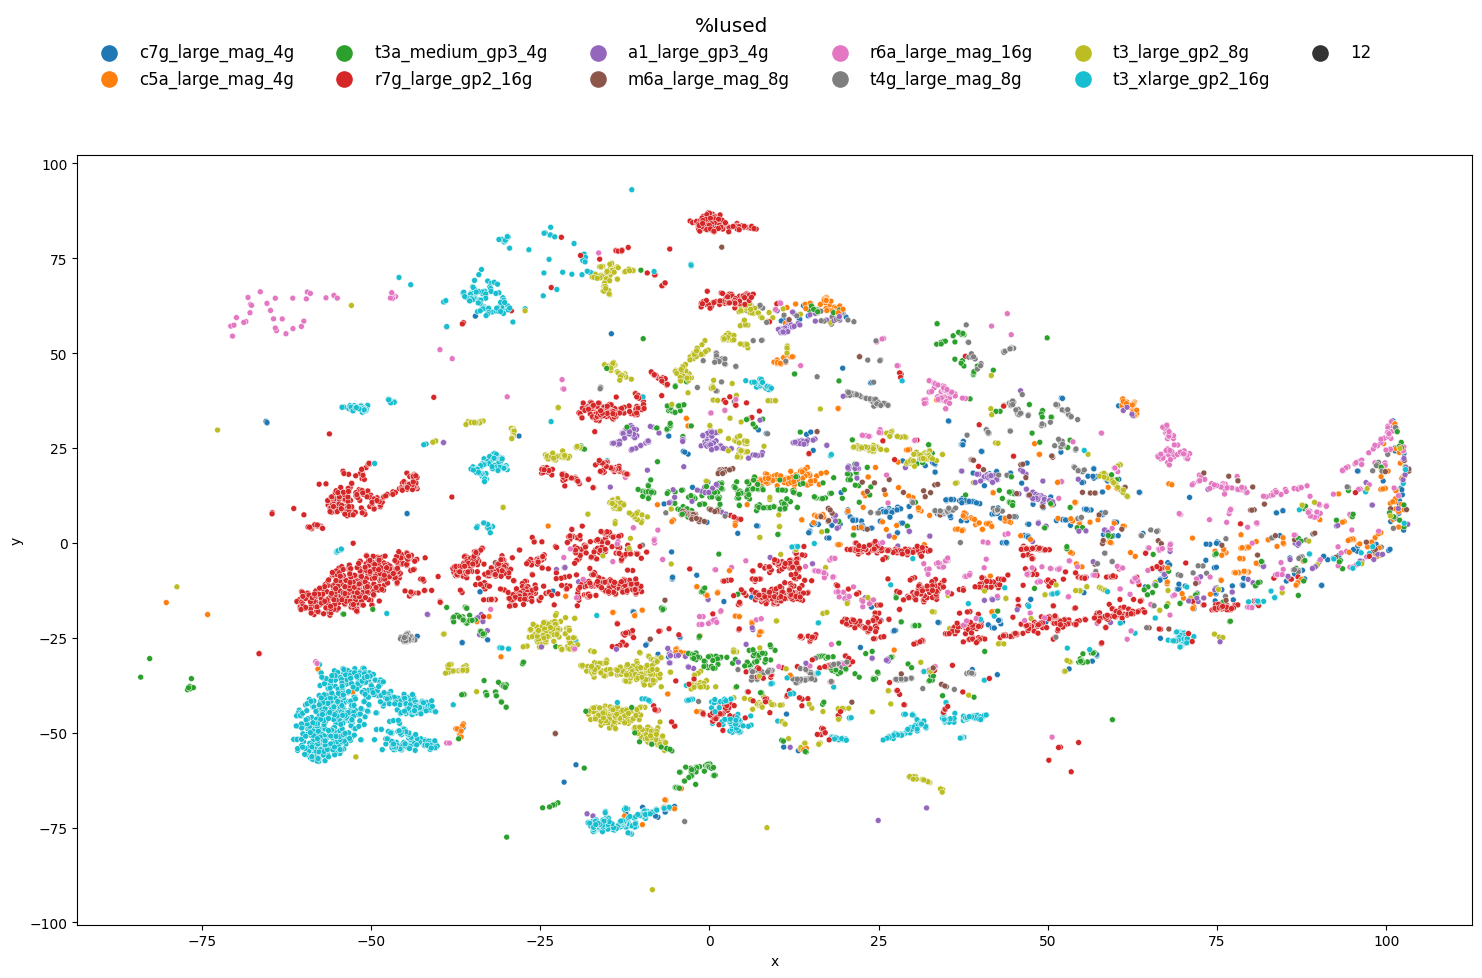

In [270]:
plt.rc('legend',fontsize=12) # using a size in points
#plt.rc('legend',fontsize='medium') # using a named size

df = pd.DataFrame({'x':tsne_em[:,0], 'y': tsne_em[:,1], 'instance': instances,
                   'bg_kind':bgs,
                    'bg_types':bg_types,
                   'avg_nums':avg_nums})
df = df[df["bg_kind"] != "None"]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))

sns.scatterplot(data=df, x="x",y="y", hue="instance", ax=ax, alpha=1.0, size=12)
#plt.legend(fontsize="x-large") # using a named size

legend = ax.legend(loc='upper left', bbox_to_anchor=(0.0,1.20), 
                   ncol=6, 
                  frameon=False,
                  )
legend.set_title(KEY_NAME,prop={'size':'x-large'})

for handle in legend.legendHandles:
    handle.set_sizes([120.0])

outname = fn.replace(".pkl", "_%fio.pdf")
print(outname)
plt.savefig(outname, bbox_inches="tight")

In [184]:
df.groupby(["bg_kind"])["x"].count().reset_index().sort_values(by="x", ascending=False)

,bg_kind,x
56,ffmpeg.sh,757
38,cpp_bench.sh,661
81,interbench.sh,585
113,redis.sh,545
92,iozone.sh,498
...,...,...
58,ffmpeg.sh-memtier.sh,1
12,ansibench.sh-pbmc.sh,1
73,hayden.sh-hayden.sh,1
80,hayden.sh-ripgrep.sh,1


In [13]:

# for aidx in range(95):
#     key_name = KEYS[aidx]
#     avg_nums = [avgdata[di][1][aidx] for di,d in enumerate(data)]
#     df = pd.DataFrame({'x':tsne_em[:,0], 'y': tsne_em[:,1], 'instance': instances, 'avg_nums':avg_nums})
#     fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
#     #sns.scatterplot(data=df, x="x",y="y", hue="instance", ax=ax, alpha=1.0)
#     sns.scatterplot(data=df, x="x",y="y", hue="avg_nums", ax=ax, alpha=1.0)
#     legend = ax.legend(loc='upper left', bbox_to_anchor=(0.0,1.10),
#                               ncol=6, 
#                               frameon=False,
#                               title = key_name)
    
#     legend.set_title(key_name,prop={'size':'x-large'})
#     for handle in legend.legendHandles:
#         handle.set_sizes([120.0])
    
#     key_name = key_name.replace("/", "-per-")
#     outname = fn.replace(".pkl", "-avg-{}.pdf".format(key_name))
#     print(outname)
#     plt.savefig(outname, bbox_inches="tight")

In [48]:
# # Create a scatter plot of the t-SNE transformed data

# plt.scatter(tsne_em[:, 0], tsne_em[:, 1], c=colors)

# # Add labels and title to the plot
# plt.xlabel('t-SNE component 1')
# plt.ylabel('t-SNE component 2')
# plt.title('t-SNE visualization of digits dataset')

# # Show the plot
# plt.show()

In [49]:
tdf = pd.DataFrame(xs)

In [50]:
tdf[10].describe()

count    7626.000000
mean       -0.381801
std         0.732663
min        -1.331181
25%        -0.723608
50%        -0.716015
75%        -0.709252
max         1.680967
Name: 10, dtype: float64